 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [222]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [223]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col=['Date'], parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [224]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [225]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)

In [226]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [227]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True,
                              infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [228]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [229]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [230]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True,
                              infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [231]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [232]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close']= sp500_history_df['Close'].str.strip('$')
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [233]:
sp500_history_df.dtypes

Close    object
dtype: object

In [234]:
sp500_history_df = sp500_history_df['Close'].astype(float)
sp500_history_df.head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64

In [235]:
sp500_history_df.dtypes

dtype('float64')

In [236]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [237]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna()
sp500_daily_returns

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64

In [238]:
sp500_daily_returns.isnull().sum()

1

In [239]:
# Rename Column
# YOUR CODE HERE
columns=['Close']
sp500_daily_returns.columns=['Returns']
sp500_daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [240]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

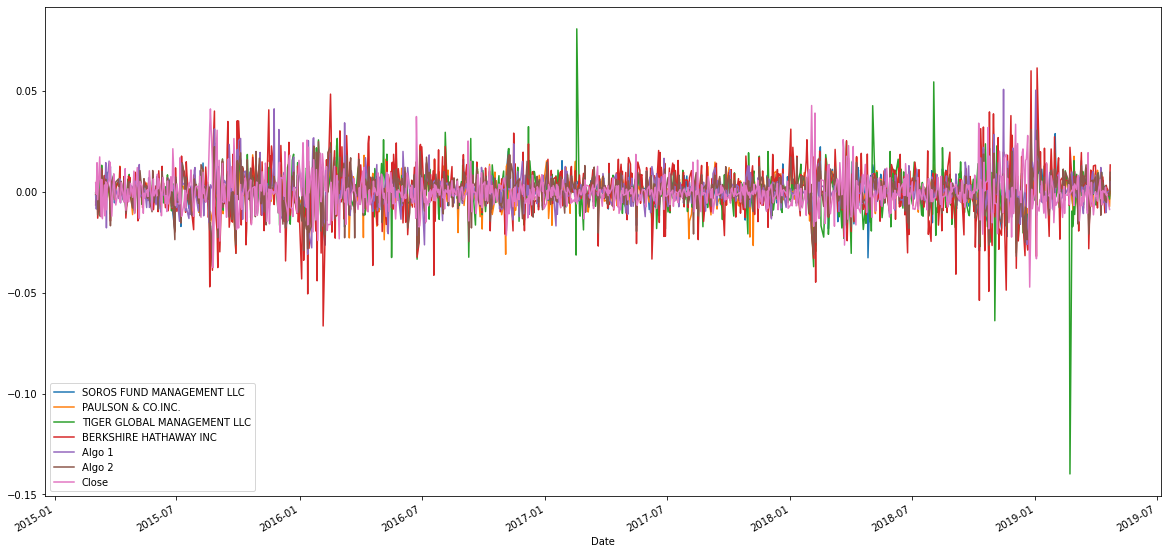

In [241]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=[20,10])

<AxesSubplot:xlabel='Date'>

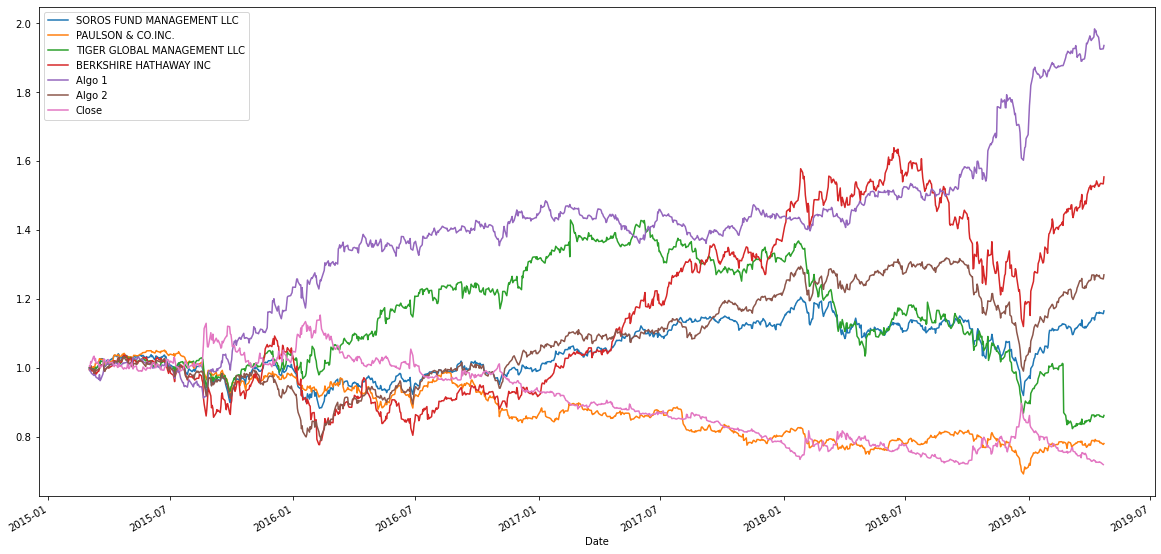

In [242]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=[20,10])

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

[]

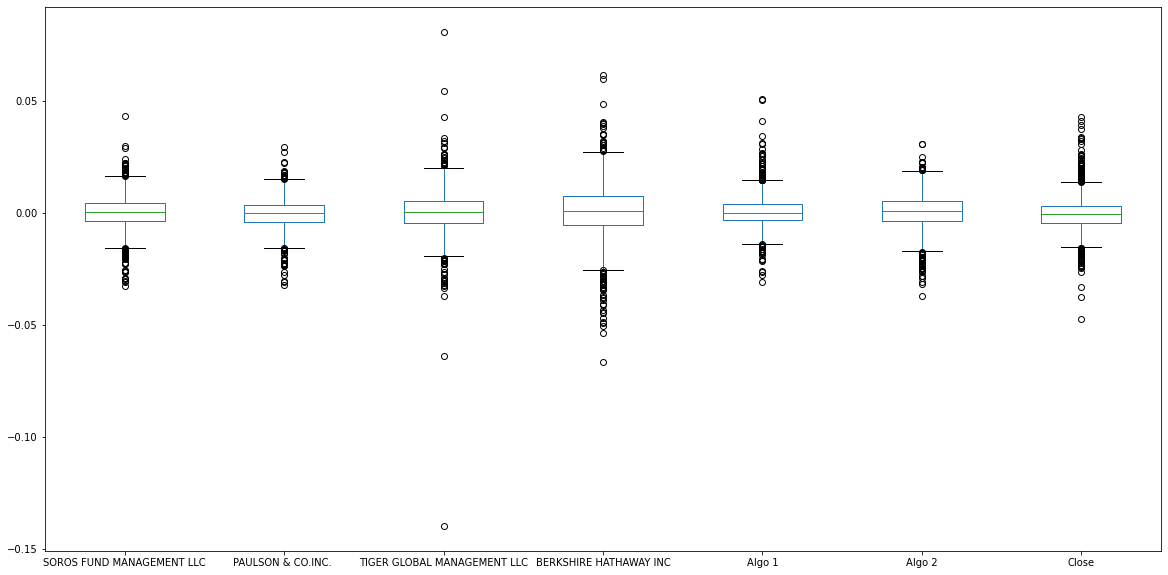

In [243]:
# Box plot to visually show risk
# YOUR CODE HERE
portfolio_std = combined_df.plot.box(figsize = [20,10])
portfolio_std.plot()

In [244]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std =daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
Close                          0.008587
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [245]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [246]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
Close                          0.136313
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

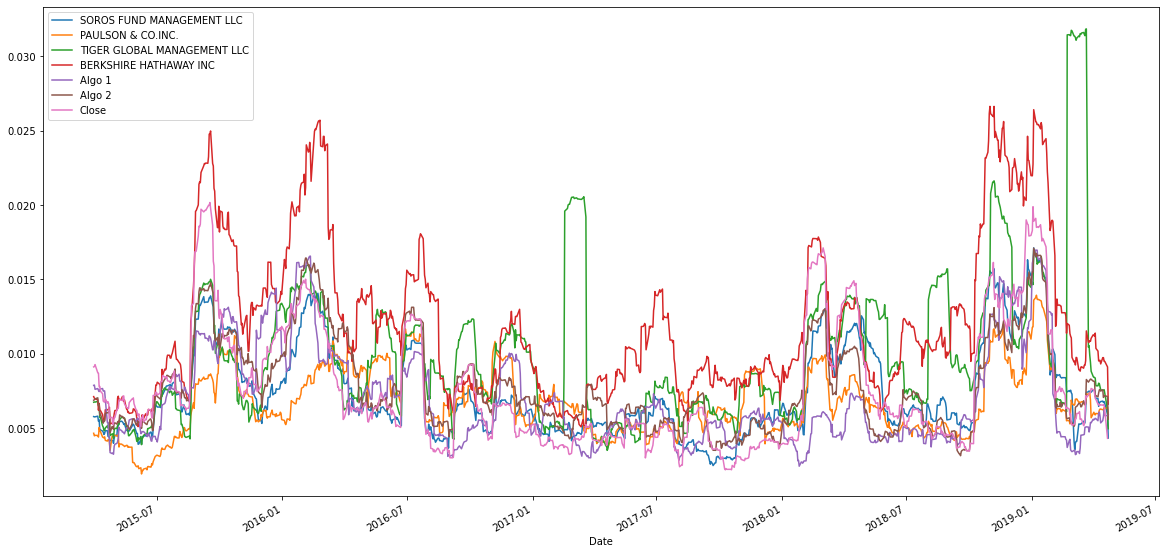

In [247]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10))

In [248]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [269]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = combined_df['Algo 1'].cov(combined_df['Close'])
variance = combined_df['Algo 1'].var()
algo1_beta = covariance / variance

algo1_beta.plot(figsize=(20, 10), title='Beta of Algo 1 Stocks vs. S&P500')

KeyError: 'Algo 1'

In [250]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [251]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Close                         -0.518582
dtype: float64

<AxesSubplot:>

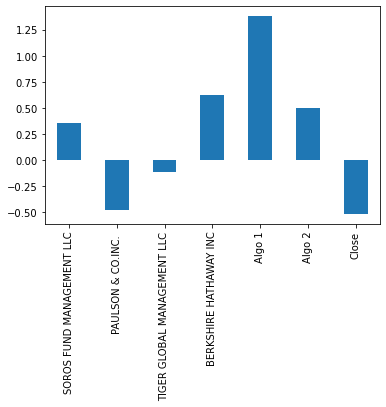

In [252]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [253]:
# Read the first stock
# YOUR CODE HERE
nike_path = Path('../hwcsv/nike.csv')
nike_df = pd.read_csv(nike_path, index_col= "Date", parse_dates=True, infer_datetime_format=True)
nike_df.head()


,Close
Date,
2019-08-01 16:00:00,83.12
2019-08-02 16:00:00,81.14
2019-08-05 16:00:00,78.97
2019-08-06 16:00:00,81.30
2019-08-07 16:00:00,81.28


In [254]:
# Read the second stock
# YOUR CODE HERE
ua_path = Path('../hwcsv/ua.csv')
ua_df = pd.read_csv(ua_path, index_col= "Date", parse_dates=True, infer_datetime_format=True)
ua_df.head()

,Close
Date,
2019-08-01 16:00:00,19.12
2019-08-02 16:00:00,19.19
2019-08-05 16:00:00,18.40
2019-08-06 16:00:00,18.97
2019-08-07 16:00:00,18.84


In [255]:
# Read the third stock
# YOUR CODE HERE
acushnet_path = Path('../hwcsv/acushnet.csv')
acushnet_df = pd.read_csv(acushnet_path, index_col= "Date", parse_dates=True, infer_datetime_format=True)
acushnet_df.head()

,Close
Date,
2019-08-01 16:00:00,25.22
2019-08-02 16:00:00,25.16
2019-08-05 16:00:00,24.72
2019-08-06 16:00:00,24.94
2019-08-07 16:00:00,23.96


In [256]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_df= pd.concat([nike_df, ua_df, acushnet_df], axis='columns', join='inner')
combined_df.head()

,Close,Close,Close
Date,,,
2019-08-01 16:00:00,83.12,19.12,25.22
2019-08-02 16:00:00,81.14,19.19,25.16
2019-08-05 16:00:00,78.97,18.40,24.72
2019-08-06 16:00:00,81.30,18.97,24.94
2019-08-07 16:00:00,81.28,18.84,23.96


In [257]:
# Reset the index
# YOUR CODE HERE
# Taken care of...


In [258]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
columns = ['NKE','UA','GOLF']
combined_df.columns = columns
combined_df.head()

,NKE,UA,GOLF
Date,,,
2019-08-01 16:00:00,83.12,19.12,25.22
2019-08-02 16:00:00,81.14,19.19,25.16
2019-08-05 16:00:00,78.97,18.40,24.72
2019-08-06 16:00:00,81.30,18.97,24.94
2019-08-07 16:00:00,81.28,18.84,23.96


In [259]:
# Drop Nulls
# YOUR CODE HERE
combined_df.isnull().sum()
combined_df.dropna()
combined_df.head()

,NKE,UA,GOLF
Date,,,
2019-08-01 16:00:00,83.12,19.12,25.22
2019-08-02 16:00:00,81.14,19.19,25.16
2019-08-05 16:00:00,78.97,18.40,24.72
2019-08-06 16:00:00,81.30,18.97,24.94
2019-08-07 16:00:00,81.28,18.84,23.96


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [260]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns=combined_df.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

Date
2019-08-01 16:00:00    4.348667e+01
2019-08-02 16:00:00    1.862534e+03
2019-08-05 16:00:00    7.766146e+04
2019-08-06 16:00:00    3.318992e+06
2019-08-07 16:00:00    1.405925e+08
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [261]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df["Weighted Returns"] = cumulative_returns
combined_df.head()

,NKE,UA,GOLF,Weighted Returns
Date,,,,
2019-08-01 16:00:00,83.12,19.12,25.22,4.348667e+01
2019-08-02 16:00:00,81.14,19.19,25.16,1.862534e+03
2019-08-05 16:00:00,78.97,18.40,24.72,7.766146e+04
2019-08-06 16:00:00,81.30,18.97,24.94,3.318992e+06
2019-08-07 16:00:00,81.28,18.84,23.96,1.405925e+08


In [262]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df = combined_df.dropna()
combined_df.head()

,NKE,UA,GOLF,Weighted Returns
Date,,,,
2019-08-01 16:00:00,83.12,19.12,25.22,4.348667e+01
2019-08-02 16:00:00,81.14,19.19,25.16,1.862534e+03
2019-08-05 16:00:00,78.97,18.40,24.72,7.766146e+04
2019-08-06 16:00:00,81.30,18.97,24.94,3.318992e+06
2019-08-07 16:00:00,81.28,18.84,23.96,1.405925e+08


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [263]:
# Risk
# YOUR CODE HERE
combined_std = combined_df.std()
combined_std.head()

NKE                 7.935268
UA                  4.513752
GOLF                3.886254
Weighted Returns         NaN
dtype: float64

<AxesSubplot:xlabel='Date'>

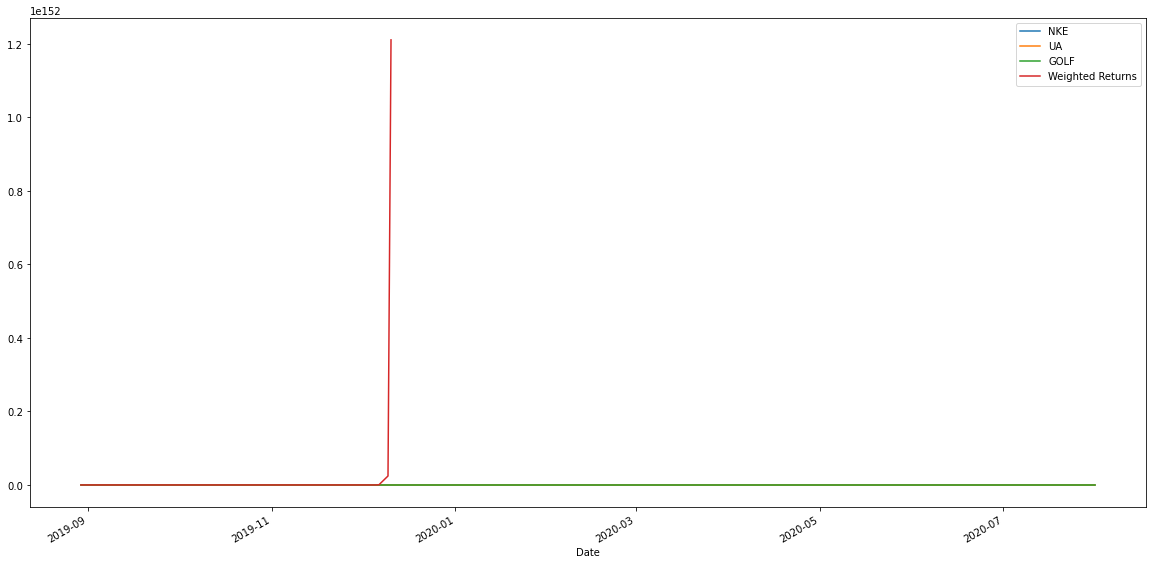

In [264]:
# Rolling
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=[20,10])

In [265]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

NKE                 184.490358
UA                   48.679879
GOLF                120.137058
Weighted Returns           NaN
dtype: float64

<AxesSubplot:>

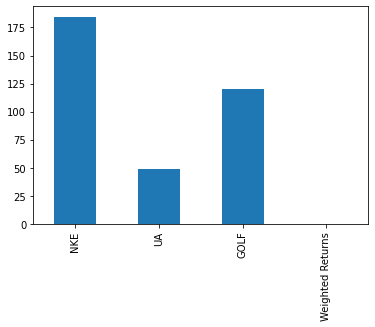

In [266]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar')

In [267]:
# Create a correlation analysis
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,NKE,UA,GOLF,Weighted Returns
NKE,1.000000,0.201322,0.798908,-0.0
UA,0.201322,1.000000,-0.070318,-0.0
GOLF,0.798908,-0.070318,1.000000,-0.0
Weighted Returns,-0.000000,-0.000000,-0.000000,NaN


In [268]:
# Beta
# YOUR CODE HERE
covariance = combined_df['NKE'].cov(combined_df['Weighted Returns'])
variance = combined_df['Weighted Returns'].var()
amzn_beta = covariance / variance
amzn_beta

nan